In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
import jax

In [2]:
# setting hyperparameters
S = 10 # sessions
T = 1000 # trials per session
N = T * S # total data points
C = 2 # classes
K = 1 # states
D = 2 # features (sensory & bias)

In [3]:
# True Transition Matrix
trueP = np.ones((1,1))
print("True Transition Matrix P")
print(trueP)

True Transition Matrix P
[[1.]]


Session indicies
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


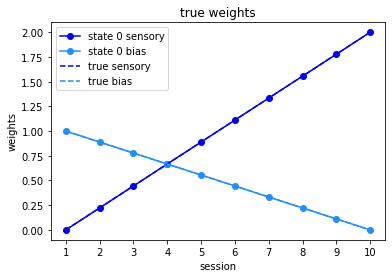

(10000, 1, 2, 2)


In [4]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,2,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.linspace(1,0,S) # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
plotting_weights(trueW,sessInd,trueW,'true weights')
print(trueW.shape)

In [5]:
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)

# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/N={N}_{K}_state_drift_train')
# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/{K}_state_drift_test')
simX = np.load(f'../data/N={N}_{K}_state_drift_trainX.npy')
simY = np.load(f'../data/N={N}_{K}_state_drift_trainY.npy')

#simPhi = dGLM_HMM.observation_probability(simX, trueW)

In [7]:
ourSigma = np.array([0.11,0.22]).reshape((1,D))
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['normal', (0,1)]) # initialize the model parameters
checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, sigma=reshapeSigma(ourSigma, K, D), sessInd=sessInd, pi0=None, maxIter=250, tol=1e-3) # fit the model
          

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


test LL per trial= -0.5407467200807129


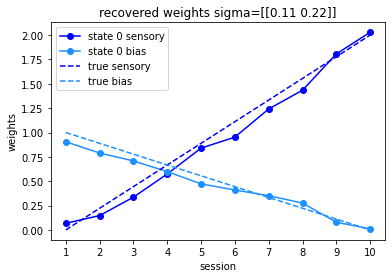

In [11]:
testX = np.load(f'../data/{K}_state_drift_testX.npy')
testY = np.load(f'../data/{K}_state_drift_testY.npy')
testPhi = dGLM_HMM.observation_probability(testX, checkW)
_, _, testLl = dGLM_HMM.forward_pass(testY,checkP,testPhi)
print("test LL per trial=", testLl/N)

plotting_weights(checkW, sessInd, trueW, 'recovered weights sigma='+str(ourSigma))




In [5]:
#Fitting for multiple values of Sigma 
sigmaList = [0.01,0.032,0.1,0.32,1,10,100]
fit_multiple_sigmas(N=N,K=K,D=D,C=C, sessInd=sessInd, sigmaList=sigmaList, inits=1, maxiter=250, modelType='drift', save=True)

0


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / 

1


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


2


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


3
4


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


5
6


(array([[[-9824.53316045, -8169.51166529, -7815.85635908, ...,
          -5871.88928999, -5871.88669662, -5871.88418145],
         [-5871.88175389, -5782.51490324, -5728.45226125, ...,
              0.        ,     0.        ,     0.        ],
         [-5626.30817613, -5577.61668979, -5569.34978564, ...,
              0.        ,     0.        ,     0.        ],
         ...,
         [-5562.12603446, -5561.89041258, -5561.88969251, ...,
              0.        ,     0.        ,     0.        ],
         [-5561.88969076, -5561.8766452 , -5561.87664693, ...,
              0.        ,     0.        ,     0.        ],
         [-5561.87664776, -5561.87653537, -5561.8765353 , ...,
              0.        ,     0.        ,     0.        ]]]),
 array([[[[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]]]]),
 array([[[[[[ 0.55312514,  0.        ],
            [ 0.68935842,  0.        ]]],
 
 
          [[[ 0.55312514,  0.  

In [68]:
evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], modelType='drift', save=False, order='increasing')

array([[-0.68891189, -0.56525629, -0.53953632, -0.53975751, -0.53985551,
        -0.53986916, -0.53986931]])

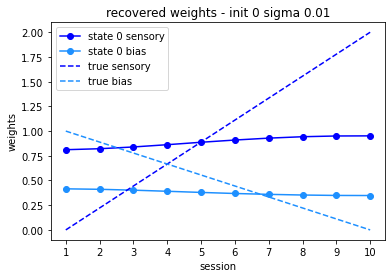

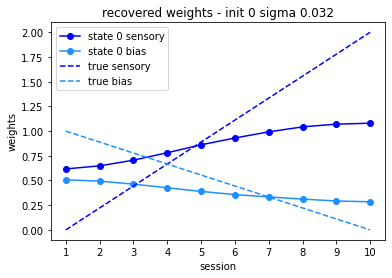

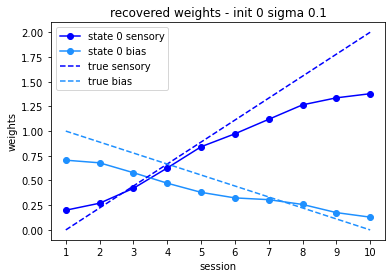

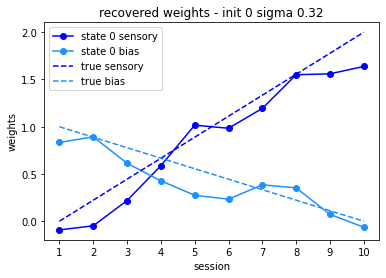

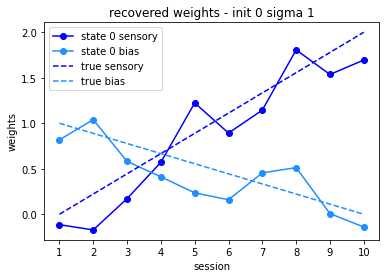

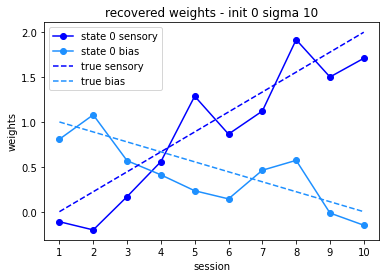

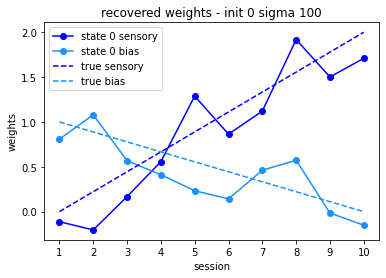

In [75]:
allW = np.load('../data/allW_T=100_one_state_drift_Penalty_reverseSigma.npy')
for init in range(0,1):
    for indSigma in range(0,len(sigmaList)): # range(len(sigmaList)-1,-1,-1): - decreasing sigma
        plotting_weights( reshapeWeights(allW[init, indSigma],sessInd_100, sessInd_1000), sessInd, trueW, f'recovered weights - init {init} sigma {sigmaList[indSigma]}')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


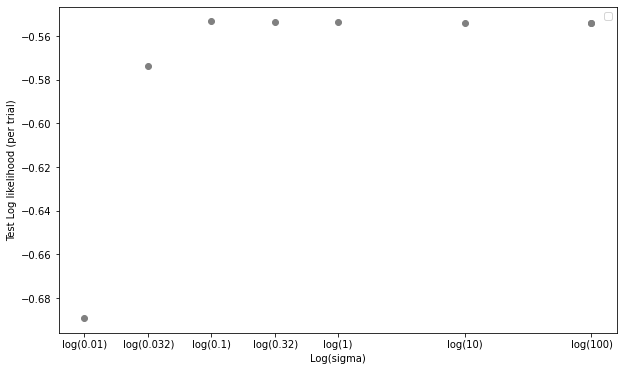

In [39]:
testLl = evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], inits=1, maxiter=250, modelType='drift', save=False, order='increasing')

fig, axes = plt.subplots(1, figsize = (10,6))
sigma_testLl_plot(sigmaList=sigmaList, testLl=testLl, axes=axes, title='', label='', save_fig=False)

In [41]:
# previous way of doing sigma plots
# sigmaList = [0.01,0.032,0.1,0.32,1,10,100]
# inits = 1
# N = 1000 * 10
# allLl_drift = np.load('../data/allLl_T=100_one_state_drift_Penalty_reverseSigma.npy')
# allP_drift = np.load('../data/allP_T=100_one_state_drift_Penalty_reverseSigma.npy')
# allW_drift = np.load('../data/allW_T=100_one_state_drift_Penalty_reverseSigma.npy')
# testX = np.load('../data/one_state_drift_testX.npy')
# testY = np.load('../data/one_state_drift_testY.npy')
# testLl_drift = np.zeros((inits, len(sigmaList)))
# # Evaluate on test data
# for init in range(0,inits):
#     for indSigma in range(0, len(sigmaList)):  
#         sess = len(sessInd)-1
#         for s in range(0, sess):
#             # evaluate on test data for each session separately
#             testPhi = dGLM_HMM.observation_probability(testX, reshapeWeights(allW_drift[init, indSigma], sessInd_100, sessInd_1000))
#             _, _, temp = dGLM_HMM.forward_pass(testY[sessInd[s]:sessInd[s+1]],allP_drift[init, indSigma],testPhi[sessInd[s]:sessInd[s+1]])
#             testLl_drift[init, indSigma] += temp

# testLl_drift = testLl_drift / N
# # Plotting test log likelihood as function of sigma
# # SAME FOR ALL INITIALIZATIONS (I CHECKED)

# for init in range(0,inits):
#     plt.figure(figsize=(12,7))
#     #plt.title("Drift state - T=100, decreasing order of fitting sigmas")
#     for indSigma in range(2, len(sigmaList)):
#         plt.scatter(np.log(sigmaList[indSigma]), testLl_drift[init,indSigma], color='gray')
#     plt.ylabel("Test Log likelihood (per trial)")
#     plt.xticks(np.log(sigmaList),[f'np.log({sigma})' for sigma in sigmaList])
#     plt.xlabel("Log(sigma)")
#     #plt.show()
# plt.scatter(np.log(sigmaList[-1]), testLl_drift[init,-1], color='gray',label='T=100')


Session indicies
[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


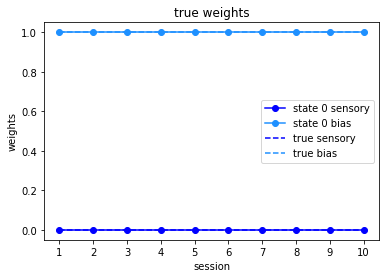

(10000, 1, 2, 2)


In [6]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = 0 # state 1 sensory (increasing)
ourW[:,0,0] = 1 # state 1 bias (decreasing)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,0] = ourW[sess,:,:]
sessInd.append(N)
print("Session indicies")
print(sessInd)
plotting_weights(trueW,sessInd,trueW,'true weights')
print(trueW.shape)


In [65]:
dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/N={N}_{K}_state_constant_train')
# _, _, _= dGLM_HMM.simulate_data(trueW, trueP, sessInd, save=True, title=f'../data/{K}_state_constant_test')
simX = np.load(f'../data/N={N}_{K}_state_constant_trainX.npy')
simY = np.load(f'../data/N={N}_{K}_state_constant_trainY.npy')

#simPhi = dGLM_HMM.observation_probability(simX, trueW)

In [ ]:
# folds = 5
# trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd,folds=folds)
# weightDistributionList = [['uniform', (-2,2)], ['normal', (0,1)]]
initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['normal', (0,1)]) # initialize the model parameters
# checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, sigma=trueSigma, sessInd=sessInd, pi0=None, maxIter=20, tol=1e-3) # fit the model
checkP, checkW, checkLl = dGLM_HMM.fit(simX, simY,  initP, initW, reshapeSigma(0.1, 1, 2), sessInd=sessInd, pi0=None, maxIter=10, tol=1e-3) # fit train data                

-2932.99077711303


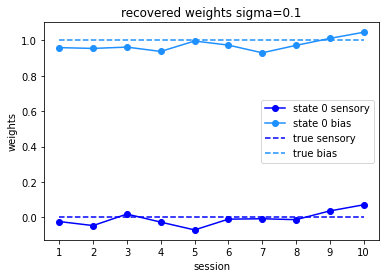

-2937.308437591114


In [35]:
testPhi = dGLM_HMM.observation_probability(simX, checkW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)

plotting_weights(checkW, sessInd, trueW, 'recovered weights sigma=0.1')

testPhi = dGLM_HMM.observation_probability(simX, trueW)
_, _, trueLl = dGLM_HMM.forward_pass(simY,trueP,testPhi)
print(trueLl)


In [7]:
fit_multiple_sigmas(N=N,K=K,D=D,C=C, sessInd=sessInd, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], inits=1, maxiter=350, modelType='constant', save=True)

0


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


1
2
3


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


4
5
6


(array([[[-10493.22438476,  -8482.20521898,  -7546.26589292, ...,
               0.        ,      0.        ,      0.        ],
         [ -5829.36492452,  -5828.32166319,  -5827.83272526, ...,
               0.        ,      0.        ,      0.        ],
         [ -5827.08867453,  -5824.65148228,  -5824.56904174, ...,
               0.        ,      0.        ,      0.        ],
         ...,
         [ -5823.4406957 ,  -5823.38167349,  -5823.38171627, ...,
               0.        ,      0.        ,      0.        ],
         [ -5823.3817165 ,  -5823.38029488,  -5823.38029603, ...,
               0.        ,      0.        ,      0.        ],
         [ -5823.3802958 ,  -5823.38029059,  -5823.38029011, ...,
               0.        ,      0.        ,      0.        ]]]),
 array([[[[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]],
 
         [[1.]]]]),
 array([[[[[[ 0.99427213,  0.        ],
            [-0.02650709,  0.        ]]],

NameError: name 'sigma_testLl_plot' is not defined

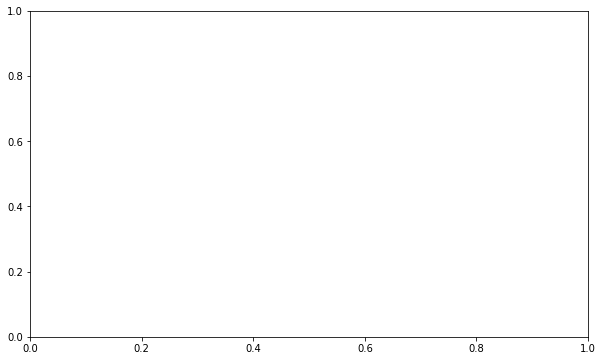

In [9]:
testLl = evaluate_multiple_sigmas(N,K,D,C, trainSessInd=None, testSessInd=None, sigmaList=[0.01,0.032,0.1,0.32,1,10,100], modelType='constant', save=False)


fig, axes = plt.subplots(1, figsize = (10,6))
sigma_testLl_plot(sigmaList=sigmaList, testLl=testLl, axes=axes, title='', label='', save_fig=False)

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


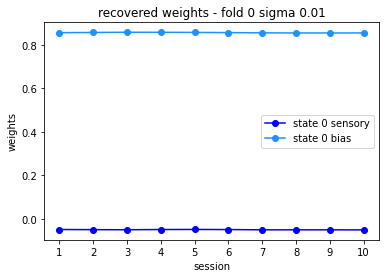

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


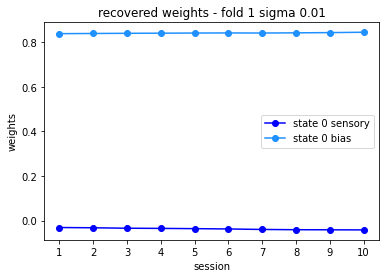

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


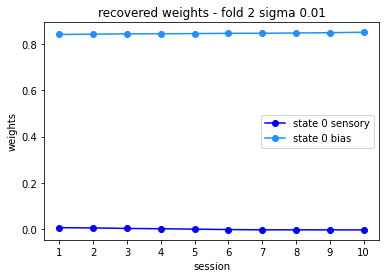

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


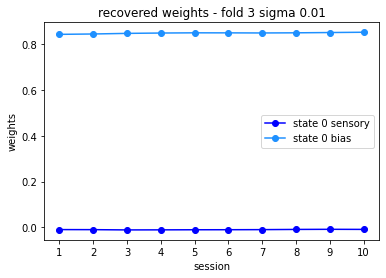

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


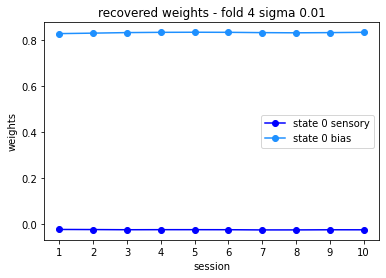

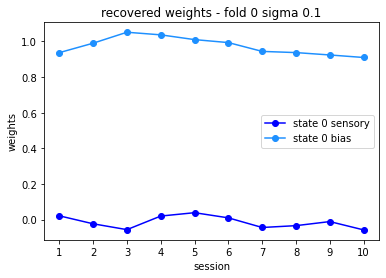

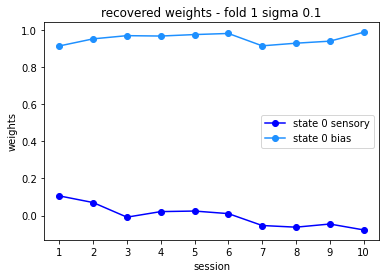

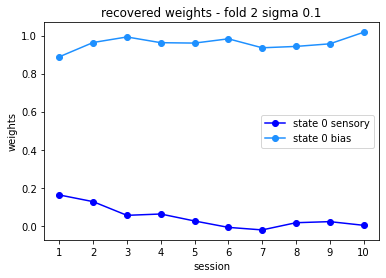

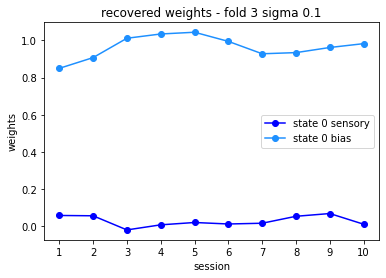

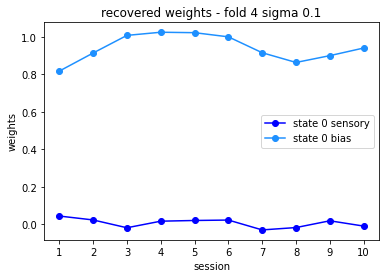

/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/scipy/optimize/optimize.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


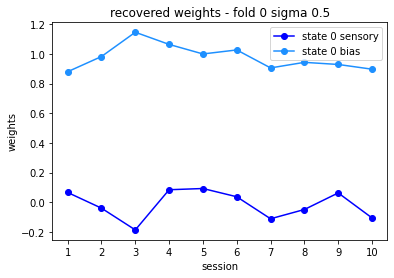

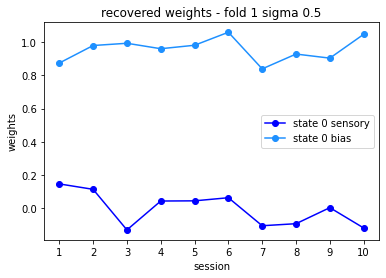

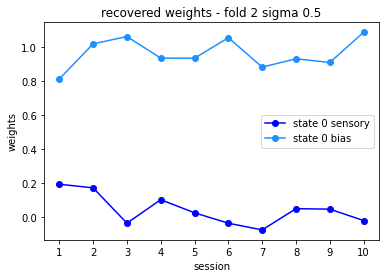

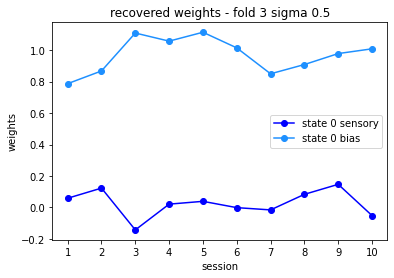

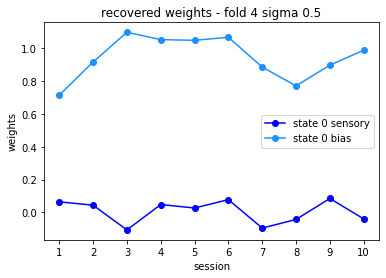

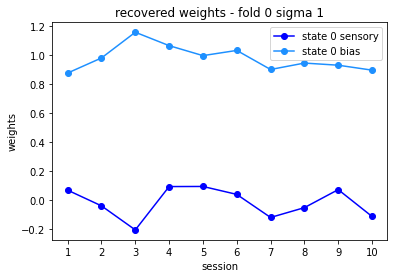

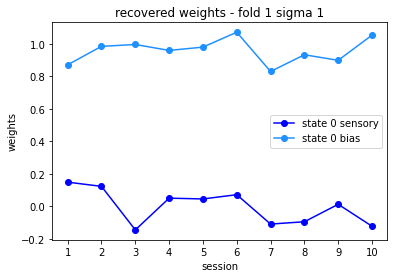

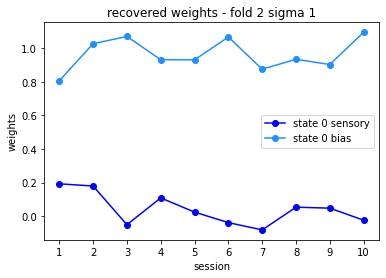

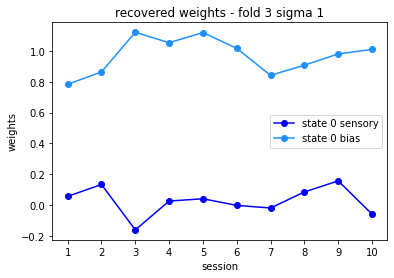

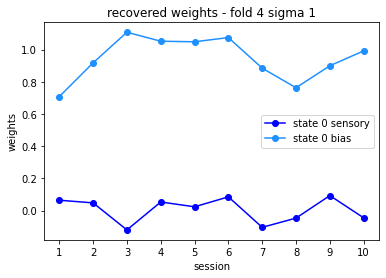

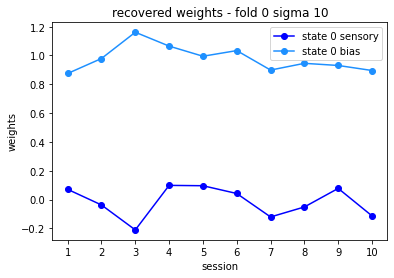

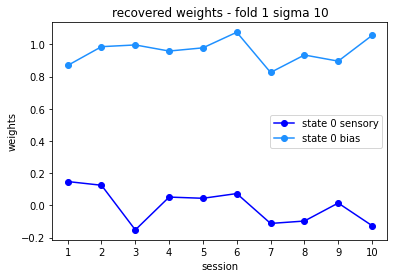

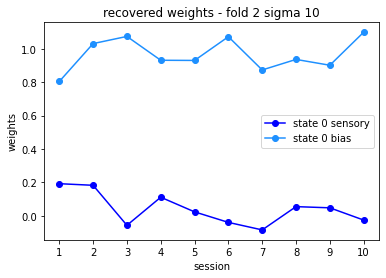

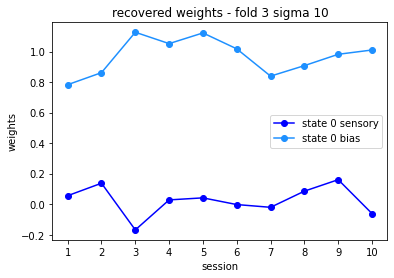

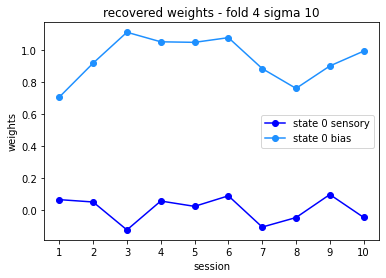

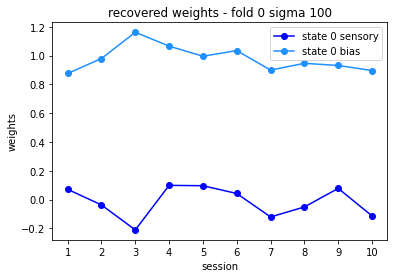

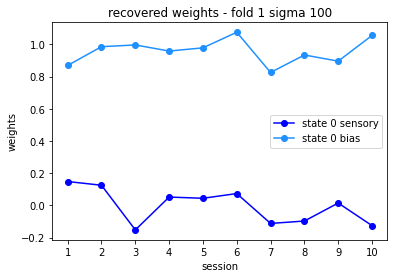

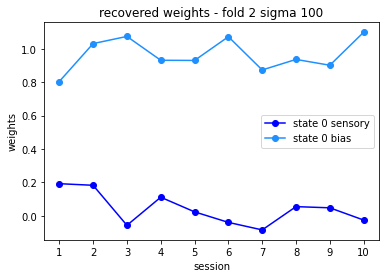

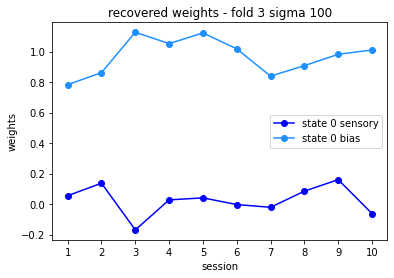

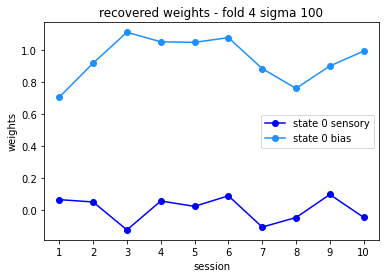

In [ ]:
# CV Fitting for multiple values of Sigma
sigmaList = [0.01,0.032,0.1,0.32,1,10,100]
folds = 5
inits = 3
trainX, trainY, trainSessInd, testX, testY, testSessInd = dGLM_HMM.split_data(x=simX, y=simY, sessInd=sessInd, folds=folds)
maxiter = 250 # 250 # maximum number of iterations

trainN = trainX[0].shape[0]
testLl = np.zeros((inits, len(sigmaList)))
trainLl = np.zeros((inits, folds, len(sigmaList), maxiter))
allP = np.zeros((inits, len(sigmaList), K,K))
allW = np.zeros((inits, len(sigmaList),N,K,D,C))
for init in range(0,inits):
    for indSigma in range(0, len(sigmaList)):  
        if (indSigma == 0):
            initP, initW = dGLM_HMM.generate_param(sessInd=sessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
        else:
            initP = allP[indSigma-1]
            initW = allW[indSigma-1]
            
        temptestLl = np.zeros((folds))
        temptrainLl = np.zeros((folds, maxiter))
        tempP = np.zeros((folds,K,K))
        tempW = np.zeros((folds,trainN,K,D,C))
        tempW_reshaped = np.zeros((folds,N,K,D,C))

        for i in range(0, folds):    
            initW_reshaped = reshapeWeights(w=initW, oldSessInd=sessInd, newSessInd=trainSessInd[i])
            # fit on train data
            tempP[i], tempW[i], temptrainLl[i] = dGLM_HMM.fit(trainX[i], trainY[i],  initP, initW_reshaped, sigma=reshapeSigma(sigmaList[indSigma], K, D), sessInd=trainSessInd[i], pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
            plotting_weights(reshapeWeights(tempW[i], trainSessInd[i], sessInd), sessInd, trueW, f'recovered weights - fold {i} sigma {sigmaList[indSigma]}')

            # reshaping fitted weights from train to test
            testW = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=testSessInd[i])
            # evaluate on test data
            testPhi = dGLM_HMM.observation_probability(testX[i], testW)
            _, _, temptestLl[i] = dGLM_HMM.forward_pass(testY[i],tempP[i],testPhi)

            # reshaping weights to match whole data set
            tempW_reshaped[i] = reshapeWeights(w=tempW[i], oldSessInd=trainSessInd[i], newSessInd=sessInd)
        
        # averaging across folds
        testLl[init, indSigma] = np.log(np.mean(np.exp(temptestLl), axis=0))
        trainLl[init, :,indSigma,:] = temptrainLl # we want the full trajectory
        allP[init, indSigma] = tempP.mean(axis=0)
        allW[init, indSigma] = tempW_reshaped.mean(axis=0)

np.save('../data/testLl_one_state_constant', testLl)
np.save('../data/trainLl_one_state_constant', trainLl)
np.save('../data/allP_one_state_constant', allP)
np.save('../data/allW_one_state_constant', allW)
    